In [3]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import StructuredMessage
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient



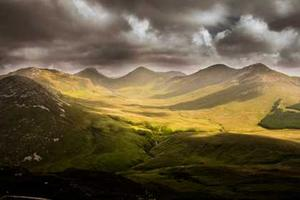

In [10]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.

pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img


In [11]:
# Use asyncio.run(...) when running in a script.
client = OpenAIChatCompletionClient(
    model="gpt-4.1-mini"
)
# 1️⃣ Create agent
agent = AssistantAgent(
        name="vision_agent",
        model_client=client # vision-capable model
)
result = await agent.run(task=multi_modal_message)
print(result.messages[-1].content)  # type: ignore


The image depicts a dramatic, mountainous landscape under a moody, cloudy sky. Sunlight breaks through the dense clouds, casting a warm, golden light on the rolling hills and valleys. The terrain features gentle slopes with patches of green vegetation, and the overall atmosphere suggests a serene yet wild natural environment. The contrast between the illuminated areas and the darker shadows creates a striking visual effect.
